In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from scipy.spatial.distance import pdist, squareform
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

from pandas import plotting

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#plotly 
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(style="whitegrid")

plt.style.use('fivethirtyeight')

In [2]:
import warnings #para que no molesten los warnings
warnings.filterwarnings('ignore')

This dataset gives us information about potability for different waters with respect to their conductivity, PH, etc. With this information we expect to extract conclusions about which components have a bigger impact on the potability of water.

# Part 0: Preprocessing

In [3]:
df = pd.read_csv ('../input/water-potability/water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


### We check for null values

In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df.shape

(3276, 10)

In [6]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


### There are null values, let's check which:

In [8]:
df[df['Sulfate'].isnull()]
df[df['ph'].isnull()]
df[df['Trihalomethanes'].isnull()]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
62,NaN,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602,0
81,5.519126,168.728583,12531.601921,7.730723,NaN,443.570372,18.099078,NaN,3.758996,0
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982,0
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158,0
119,7.812804,196.583886,42550.841816,7.334648,NaN,442.545775,14.666917,NaN,6.204846,0
...,...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,NaN,3.758180,1
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,NaN,2.817780,1
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327,1
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,NaN,4.333953,1


### We replace them with the mean

In [9]:
df['ph']=df['ph'].fillna(df.groupby(['Potability'])['ph'].transform('mean'))
df['Sulfate']=df['Sulfate'].fillna(df.groupby(['Potability'])['Sulfate'].transform('mean'))
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df.groupby(['Potability'])['Trihalomethanes'].transform('mean'))

In [10]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### No more null values remain.

Data preprocessing is complete

In [11]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

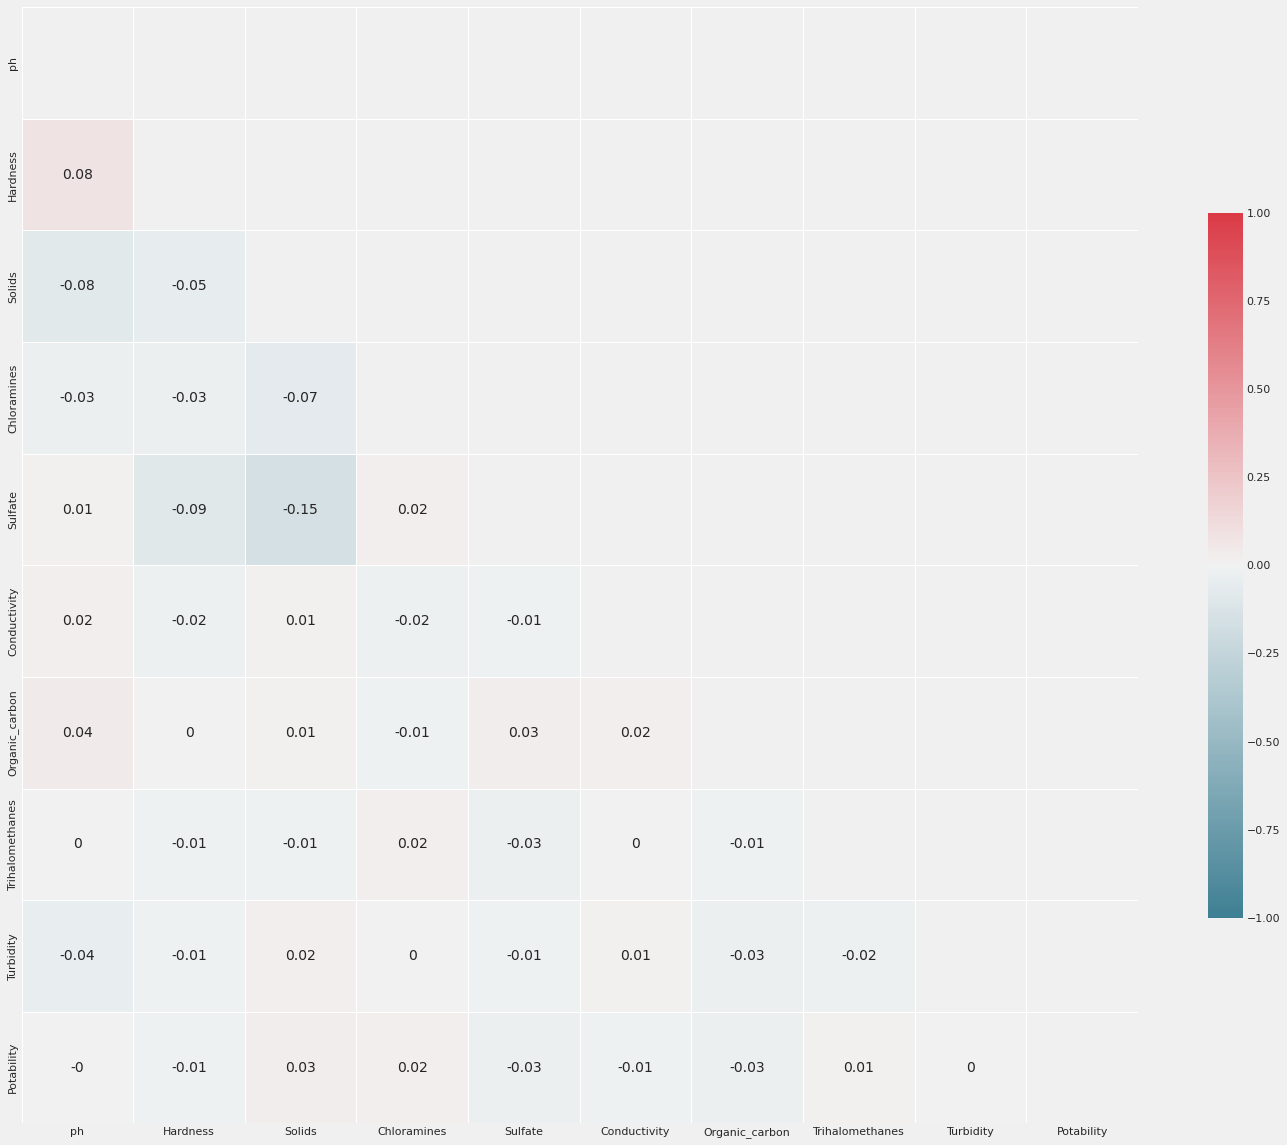

In [12]:
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=['Potability']
X=df.drop(cols, axis=1)

In [14]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

           feature        VIF
0               ph  22.852476
1         Hardness  30.840673
2           Solids   6.969494
3      Chloramines  19.583666
4          Sulfate  56.235910
5     Conductivity  25.978045
6   Organic_carbon  18.697147
7  Trihalomethanes  17.365660
8        Turbidity  24.131537


# Part 1: Data visualtization

In [15]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

# Logistic Regression

In [16]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [18]:
lr=LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred=lr.predict(X_train)


In [20]:
print("Accuracy Score:-", metrics.accuracy_score(y_train, y_pred))
print("F1 Score:-", metrics.f1_score(y_train, y_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_train, y_pred))
print("Log Loss:-", metrics.log_loss(y_train, y_pred))
print("Precision Score:-", metrics.precision_score(y_train, y_pred))
print("Recall Score:-", metrics.recall_score(y_train, y_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_train, y_pred))

Accuracy Score:- 0.6056166056166056
F1 Score:- 0.0
Average Precision Score:- 0.39438339438339437
Log Loss:- 13.621519872473936
Precision Score:- 0.0
Recall Score:- 0.0
ROC-AUC Score:- 0.5


In [21]:
y_test_pred=lr.predict(X_test)


In [22]:
lr_acc=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy Score:-",lr_acc)
print("F1 Score:-", metrics.f1_score(y_test, y_test_pred))
print("Average Precision Score:-", metrics.average_precision_score(y_test, y_test_pred))
print("Log Loss:-", metrics.log_loss(y_test, y_test_pred))
print("Precision Score:-", metrics.precision_score(y_test, y_test_pred))
print("Recall Score:-", metrics.recall_score(y_test, y_test_pred))
print("ROC-AUC Score:-", metrics.roc_auc_score(y_test, y_test_pred))

Accuracy Score:- 0.6227106227106227
F1 Score:- 0.0
Average Precision Score:- 0.3772893772893773
Log Loss:- 13.031113438372897
Precision Score:- 0.0
Recall Score:- 0.0
ROC-AUC Score:- 0.5


In [23]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report,precision_score, plot_roc_curve, plot_precision_recall_curve, balanced_accuracy_score

def clf_scores(clf, y_predicted):
    # Accuracy
    acc_train = clf.score(X_train, y_train)*100
    acc_test = clf.score(X_test, y_test)*100
    
    roc = roc_auc_score(y_test, y_predicted)*100 
    tn, fp, fn, tp = confusion_matrix(y_test, y_predicted).ravel()
    cm = confusion_matrix(y_test, y_predicted)
    correct = tp + tn
    incorrect = fp + fn
    d=[acc_train, acc_test,  roc, correct, incorrect,  cm]
    index=["acc_train",'Test Accuracy',"Roc Score","COrrect","Incorrect","Confusion"  ]
    output=pd.DataFrame(data=d, index=index)
    
    d=sns.heatmap(cm, annot=True)
    dd=plot_roc_curve(clf, X_train, y_train)
    ddd=plot_precision_recall_curve(clf, X_train, y_train)

    return output,d, dd, ddd

(                                  0
acc_train                 60.561661
Test Accuracy             62.271062
Roc Score                      50.0
COrrect                         510
Incorrect                       309
Confusion      [[510, 0], [309, 0]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4ac5e32ed0>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f4ac5da5690>)


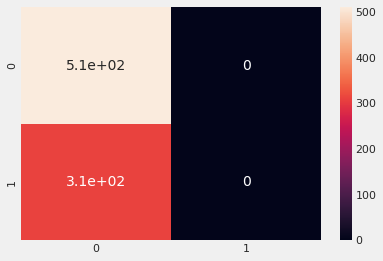

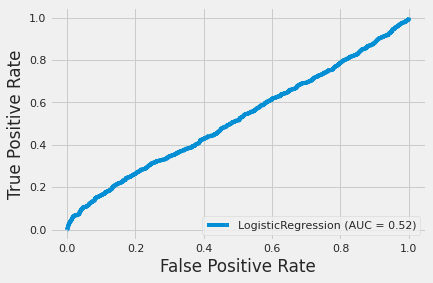

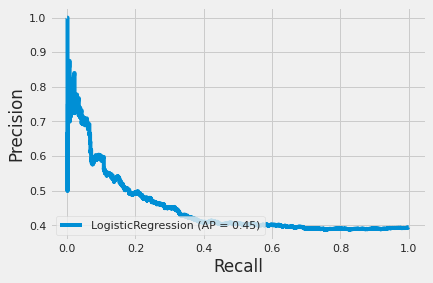

In [24]:
#1. Logistic regression

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear')
clf_lr.fit(X_train, y_train)

Y_pred_lr = clf_lr.predict(X_test)
print(clf_scores(clf_lr, Y_pred_lr))

(                                     0
acc_train                        100.0
Test Accuracy                 80.09768
Roc Score                    76.239292
COrrect                            656
Incorrect                          163
Confusion      [[469, 41], [122, 187]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4ac5d09d10>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f4ac5d3d390>)


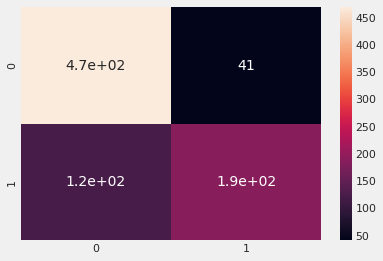

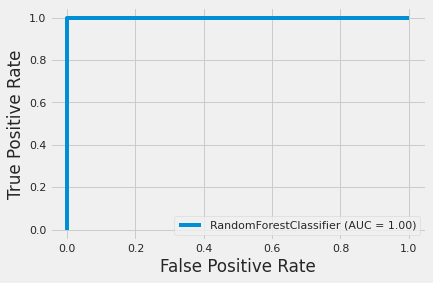

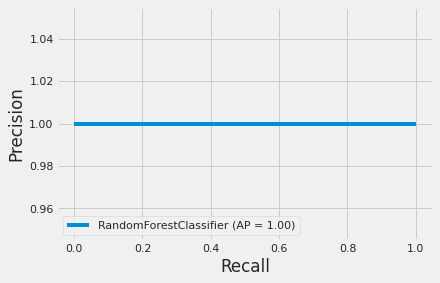

In [25]:
# 2 Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

Y_pred_rf = clf_rf.predict(X_test)
print(clf_scores(clf_rf, Y_pred_rf))

(                                     0
acc_train                    85.673586
Test Accuracy                77.899878
Roc Score                    72.816486
COrrect                            638
Incorrect                          181
Confusion      [[477, 33], [148, 161]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4ac5ad5ad0>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f4ac59d8750>)


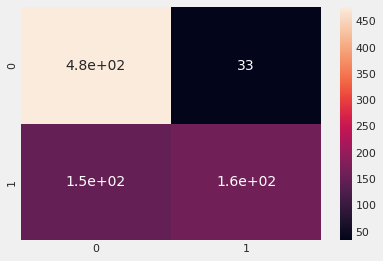

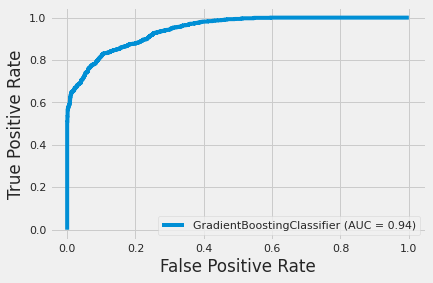

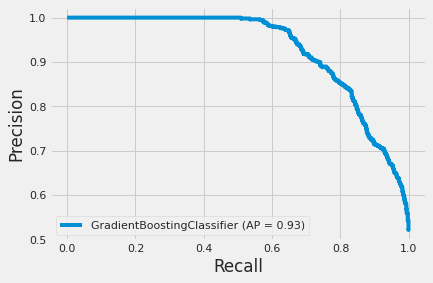

In [26]:
# 3 XGboost
from sklearn.ensemble import GradientBoostingClassifier
clf_xg = GradientBoostingClassifier()
clf_xg.fit(X_train, y_train)

Y_pred_xg = clf_xg.predict(X_test)
print(clf_scores(clf_xg, Y_pred_xg))

# Fine-tune Random Forest

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(clf_rf, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}],
             scoring='neg_mean_squared_error')

In [28]:
#now let's how the RMSE changes for each parameter configuration
cvres = grid_search_forest.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.46445052020025307 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 10}
0.4564890795420683 {'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap': True, 'max_depth': 10, 'max_features': 10, 'n_estimators': 25}
0.47952952442135444 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 10}
0.46967081588545406 {'bootstrap': True, 'max_depth': 50, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap': True, 'max_depth': 50, 'max_features': 10, 'n_estimators': 25}
0.4757064903987189 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 10}
0.46619948645908416 {'bootstrap': True, 'max_depth': None, 'max_features': 5, 'n_estimators': 25}
nan {'bootstrap': True, 'max_depth': None, 'max_features': 10, 'n_estimators': 10}
nan {'bootstrap

In [29]:
#find the best model of grid search
grid_search_forest.best_estimator_

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=25)

In [30]:
# Performance metrics
grid_best= grid_search_forest.best_estimator_.predict(X_train)
errors = abs(grid_best - y_train)
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_train))
# Calculate and display accuracy
accuracy = 100 - mape    
#print result
print('The best model from grid-search has an accuracy of', round(accuracy, 2),'%')

The best model from grid-search has an accuracy of -inf %


(                                     0
acc_train                        100.0
Test Accuracy                78.510379
Roc Score                    75.666286
COrrect                            643
Incorrect                          176
Confusion      [[445, 65], [111, 198]], <AxesSubplot:>, <sklearn.metrics._plot.roc_curve.RocCurveDisplay object at 0x7f4ac58e16d0>, <sklearn.metrics._plot.precision_recall_curve.PrecisionRecallDisplay object at 0x7f4ac58d4bd0>)


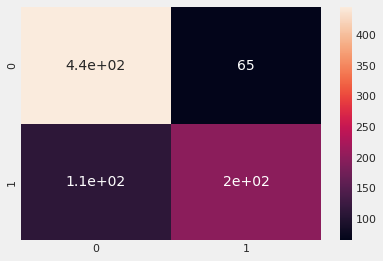

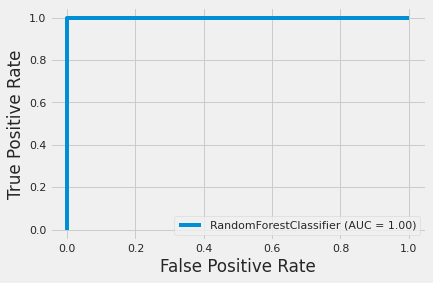

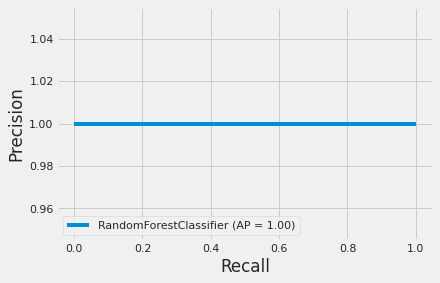

In [31]:
# Tuned Random Forest

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(bootstrap=False, max_features=5, n_estimators=25)
clf_rf.fit(X_train, y_train)                 
Y_pred_rf = clf_rf.predict(X_test)
print(clf_scores(clf_rf, Y_pred_rf))

#                                                          THE END